<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/FORM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We consider a system/model whose performance is characterized by a function $ g(x;\theta) $, where $\theta$ are model parameters and $x$ are random variables distributed as $f_X(x), x \in \mathcal{X}$. A model with parameters $\theta$ fails to perfom adequatelly in $x$ if $ g(x;\theta) \leq 0 $.

We define a failure set/domain as:
$$\mathcal{F}(\theta) = \{x \in \mathcal{X}: g(x;\theta) \leq 0  \}$$

Simlarly, a safe/reliable domain is given as the complement $\mathcal{X} ∖ \mathcal{F}(\theta)$ and it is defined follows:
$$\mathcal{R}(\theta) = \{x \in \mathcal{X}: g(x;\theta) > 0  \}  $$



We are interested in quantifying the probability
$$P_f(\theta) = \mathbb{P}[g(x;\theta) \leq 0]= \int\limits_{\mathcal{F}(\theta)} f_X(x) dx, $$
$$R(\theta) = \mathbb{P}[g(x;\theta) > 0]= 1- P_f(\theta) $$
which is an useful indicator to help with the selection of a good $\theta$.   

## **Examples** g(x,\theta)

### 1. **Structural Reliability (Structures/Loads)**
In structural engineering, the performance function $g(x, \theta)$ often represents the difference between the **resistance** of a structure and the **stress** applied to it:
$$
g(x, \theta) = \text{Resistance}(\theta) - \text{Stress}(x),
$$
where:
- $\theta$ represents the parameters defining the structural resistance (e.g., material properties, geometry).
- $x$ represents the random variables describing the applied loads or environmental conditions.

The system fails when $g(x, \theta) \leq 0$, indicating that the stress exceeds the resistance.

 ----

### 2. **Machine Learning Models (Predictors)**
In ML, the performance function $g(x, \theta)$ can represent the difference between a **point-wise performance metric** and a **threshold** that defines acceptable performance for a single data point:
$$
g(x, \theta) = \text{Metric}(x,\theta) - \text{Threshold}(x,\theta),
$$
where:
- $\theta$ represents the model parameters (e.g., weights in a neural network, coefficients in a regression model, etc.).
- $x$ represents the input data (including features and the true target $y$).
- $\text{Metric}$ is a point-wise performance metric computed for the single data point $x$.
 :
  -  **Squared Error (SE)**:   $  \text{SE}(\theta; x) = (y - f(x, \theta))^2, $
  -   **Absolute Error (AE)**:   $ \text{AE}(\theta; x) = |y - f(x, \theta)|.  $


The system fails when $g(x, \theta) \leq 0$, indicating that the model's performance on the data point $x$ falls below the acceptable threshold.

 ----



**Introduction to Probability Estimation**

Estimating probabilities is fundamental in various fields, including engineering, finance, and science. A common approach involves using Monte Carlo simulations, where a model is evaluated numerous times to estimate the likelihood of specific outcomes. This method is particularly useful when dealing with complex systems where analytical solutions are intractable.

### Estimation of $P_f(\theta)$ and $R(\theta)$

### 1. Monte Carlo (MC) Estimation

Monte Carlo estimation provides a sample-based approach to approximate the failure probability $P_f(\theta)$ or equivalently $R(\theta)$.

### Steps:
1. **Sampling**:
   Draw $N$ independent samples $\{x_i\}_{i=1}^N$ from the distribution $f_X(x)$.

2. **Evaluate $g(x; \theta)$**:
   For each sample $x_i$, evaluate $g(x_i; \theta)$. Define an indicator function:

   $$
   \mathbb{I}(x_i \in \mathcal{F}(\theta)) =
   \begin{cases}
   1 & \text{if } g(x_i; \theta) \leq 0, \\
   0 & \text{otherwise.}
   \end{cases}
   $$



3. **Estimate Failure Probability**:
   The Monte Carlo estimate of $P_f(\theta)$ is:

   $$
   \hat{P}_f(\theta) = \frac{1}{N} \sum_{i=1}^N \mathbb{I}(g(x_i; \theta) \leq 0).
   $$



4. **Estimate Reliability**:
   Using the complement, the estimate for $R(\theta)$ is:


   $$
   \hat{R}(\theta) = 1 - \hat{P}_f(\theta).
   $$



5. **Convergence**:
   By the law of large numbers, $\hat{P}_f(\theta)$ and $\hat{R}(\theta)$ converge to their true values as $N \to \infty$. The standard error decreases as $\mathcal{O}(1/\sqrt{N})$.

---

## 2. Analytical Estimation

In a few cases, an analytical expression for $P_f(\theta)$ may be derived. This depends on the form of $g(x; \theta)$ and the probability distribution $f_X(x)$.

### Case 1: Linear $g(x; \theta)$
If $g(x; \theta)$ is linear in $x$, i.e., $g(x; \theta) = a^T x + b$, and $f_X(x)$ is Gaussian $\mathcal{N}(\mu, \Sigma)$, the failure probability can sometimes be expressed using cumulative distribution functions:
$$
P_f(\theta) = P_f(a,b) = \mathbb{P}(a^T x - b \leq 0) = \Phi\left(\frac{b - a^T \mu}{\sqrt{a^T \Sigma a}}\right),
$$
where $\Phi(\cdot)$ is the CDF of the standard normal distribution.

### Case 2: Quadratic $g(x; \theta)$
If $g(x; \theta)$ is quadratic in $x$ and $f_X(x)$ is Gaussian, analytical solutions may still be possible, but they require advanced techniques (e.g., integration over ellipsoids).

### Case 3: Indicator Distributions
If $f_X(x)$ is a uniform distribution over $\mathcal{X}$, integration is straightforward:
$$
P_f(\theta) = \int_{\mathcal{F}(\theta) \cap \mathcal{X}} f_X(x) dx = \frac{\text{Volume of } \mathcal{F}(\theta) \cap \mathcal{X}}{\text{Volume of } \mathcal{X}}.
$$

### Challenges of Analytical Methods:
- Intractability for nonlinear or high-dimensional $g(x; \theta)$.
- Dependence on specific forms of $f_X(x)$.

---

## 3. Computational Issues

### Curse of Dimensionality
- The computational cost of numerical integration or Monte Carlo methods increases exponentially with the dimensionality of $\mathcal{X}$.
- **Mitigation**: Variance reduction techniques like importance sampling, stratified sampling, or quasi-Monte Carlo methods.

### Rare Event Problem
- When $P_f(\theta)$ is very small (e.g., in highly reliable systems), standard Monte Carlo methods become inefficient because very few samples fall into $\mathcal{F}(\theta)$.
- **Solution**: Use **importance sampling**, where samples are drawn from a distribution that overrepresents the failure domain, and the results are weighted to reflect $f_X(x)$.



**Estimating Rare Event Probabilities**

When the event of interest is rare (e.g., $ P_f \approx 10^{-5} $), standard Monte Carlo simulations become computationally expensive. To achieve a relative error of 10%, the required number of samples $ N $ can be calculated as:

$$
N = \frac{100}{P_f}
$$

For $ P_f = 10^{-5} $:

$$
N = \frac{100}{10^{-5}} = 10^7 \, \text{samples}
$$

If each evaluation of $ g(x; \theta) $ takes 60 seconds, the total computation time would be:

$$
10^7 \, \text{samples} \times 60 \, \text{seconds/sample} = 600 \, \text{million seconds} \approx 19 \, \text{years}
$$

**Conclusion**

Direct Monte Carlo simulation is impractical for estimating such rare event probabilities due to the prohibitive computational cost. Employing variance reduction techniques, such as importance sampling, is essential to make the estimation feasible. :contentReference[oaicite:0]{index=0}





### Nonlinear Models
- Nonlinear $g(x; \theta)$ may lead to non-convex failure domains $\mathcal{F}(\theta)$, complicating integration.
- **Solution**: Approximate $g(x; \theta)$ locally using linear or quadratic models or apply machine learning-based surrogates to estimate the failure probability.

### Gradient Computation for Optimization
- If $g(x; \theta)$ is differentiable, methods like stochastic gradient descent or adjoint methods can optimize $\theta$ directly to minimize $P_f(\theta)$.
- For non-differentiable $g(x; \theta)$, gradient-free methods (e.g., genetic algorithms) may be necessary.

---

## Summary

- **Monte Carlo methods** are the most versatile for estimating $P_f(\theta)$ and $R(\theta)$ but can be computationally expensive for high-dimensional problems or rare events.
- **Analytical methods** are efficient when applicable but are limited to specific forms of $g(x; \theta)$ and $f_X(x)$.
- **Computational challenges** can be addressed with advanced techniques like importance sampling, surrogate modeling, or gradient-based optimization.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, multivariate_normal
import scipy.stats as stats
from scipy.linalg import cholesky
from numpy.random import multivariate_normal as mvn_rnd


In [33]:
# START WITH SOME UTILS

# exmple of joint PDF abd cdf (independent)
def joint_pdf_independent(x, obj_dist_x):
    """
    Joint PDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint PDF.
    """
    fx = 1
    for xi, fx in zip(x,obj_dist_x):
        fx *= fx.pdf(xi)

    return fx

# Joint CDF
def joint_cdf_independent(x, obj_dist_x):
    """
    Joint CDF of x1 and x2.
    Args:
        x1, x2: Input variables.
        dist_obj_x1, dist_obj_x2: Distribution objects for x1 and x2.
    Returns:
        Value of the joint CDF.
    """
    fx = 1
    for xi, fx in zip(x,obj_dist_x):
        fx *= fx.cdf(xi)

    return fx

In [34]:
def HasoferLind(X, marginals=None, corr_matrix=None):
    """
    Transforms random variables X based on marginal moments (mu,std), z-trasformation
    """
    n_samples, n_dim = X.shape
    U = np.zeros_like(X)

    # Step 1: Transform
    for i in range(n_dim):
      U[:,i] = (X[:,i]-np.mean(X[:,i]))/(np.std(X[:,i])) # samples-based

    return U


def rosenblatt_transform(X, marginals, copula=None):
    """
    Rosenblatt transformation for dependent random variables.
    https://openturns.github.io/openturns/latest/theory/numerical_methods/isoprobabilistic_transformation.html#isoprobabilistic-transformation
    Args:
        X: A numpy array of shape (n_samples, n_dim) containing the random variables.
        marginals: A list of scipy.stats distribution objects corresponding to the marginals of X.
        copula: A function representing the copula C(u1, u2, ..., un). If None, independence is assumed.

    Returns:
        U: A numpy array of transformed variables in standard normal space.
    """
    n_samples, n_dim = X.shape
    U = np.zeros_like(X)

    for i in range(n_samples):
        # Initialize the transformed vector for the current sample
        Y = np.zeros(n_dim)

        # Step 1: Transform using marginal and conditional CDFs
        for k in range(n_dim):
            if k == 0:
                # First variable: use marginal CDF
                Y[k] = marginals[k].cdf(X[i, k])
            else:
                # Subsequent variables: use conditional CDF
                if copula is None:
                    # Independence assumption
                    Y[k] = marginals[k].cdf(X[i, k])
                else:
                    # Compute conditional CDF using the copula
                    raise NotImplementedError("Conditional CDF computation requires a copula.")

        # Step 2: Transform to standard normal space using inverse Gaussian CDF
        U[i, :] = norm.ppf(Y)

    return U


def generalized_nataf_transform(X, marginals, corr_matrix, psi=None):
    """
    Generalized Nataf Transformation for correlated random variables with elliptical copulas.
    https://openturns.github.io/openturns/latest/theory/numerical_methods/nataf_transformation.html

    Parameters:
        X (np.ndarray): (n_samples, n_dim) array of correlated random variables.
        marginals (list): List of marginal distribution objects (e.g., scipy.stats distributions).
        corr_matrix (np.ndarray): (n_dim, n_dim) correlation matrix of the elliptical copula.
        psi (callable): Characteristic generator of the elliptical distribution (default: Gaussian).

    Returns:
        U (np.ndarray): (n_samples, n_dim) array of transformed variables in the standard space.
    """
    n_samples, n_dim = X.shape

    # Step 1: Transform to uniform space via marginal CDFs
    W = np.zeros_like(X)
    for i in range(n_dim):
        W[:, i] = marginals[i].cdf(X[:, i])  # T1: X → W (uniform space)

    # Step 2: Transform to elliptical space via inverse CDF of standard elliptical distribution
    if psi is None:
        # Default to Gaussian copula if no characteristic generator is provided
        V = stats.norm.ppf(W)  # T2: W → V (Gaussian space)
    else:
        # For non-Gaussian elliptical copulas, use the inverse CDF of the standard elliptical distribution
        raise NotImplementedError("Custom elliptical copulas require implementing the inverse CDF.")

    # Step 3: Transform to standard space using Cholesky decomposition of the correlation matrix
    Gamma = np.linalg.inv(cholesky(corr_matrix, lower=True))  # T3: V → U (standard space)
    U = V @ Gamma.T

    return U


def inverse_nataf_transform(u, marginals, corr_matrix):
    """
    Invert the Nataf transformation to map U to X.

    Args:
        u: A numpy array of shape (n_samples, n_dim) containing the variables in U-space.
        marginals: A list of scipy.stats distribution objects corresponding to the marginals of X.
        corr_matrix: The correlation matrix of X.

    Returns:
        x: A numpy array of shape (n_samples, n_dim) containing the variables in X-space.
    """
    n_samples, n_dim = u.shape
    x = np.zeros_like(u)

    # Step 1: Generate correlated standard normal variables U
    L = cholesky(corr_matrix, lower=True)  # Cholesky factor of the correlation matrix
    u_correlated = u @ L.T  # Impose correlation structure

    # Step 2: Map U to X using the inverse CDFs
    for i in range(n_dim):
        x[:, i] = marginals[i].ppf(stats.norm.cdf(u_correlated[:, i]))

    return x

In [48]:
# =====================================================
# Examples: Iso-Probability Transformations
# =====================================================


# =====================================================
# 0. Define the DATA GEN MECH (A Probabilistic Model)
# =====================================================


def DGM(n_samples = 5000, n_dim=2):
  """
  A data generating mechanism
  """
  np.random.seed(42)

  # Define marginal distributions (e.g., Lognormal and Weibull)
  marginals = [stats.lognorm(s=0.5, scale=np.exp(0.5)),   # Lognormal
              stats.weibull_min(c=12.0, scale=1.0)]       # Weibul

  # Define correlation matrix (in the elliptical copula space)
  corr_matrix = np.array([[1.0, 0.6], [0.6, 1.0]])

  # Generate correlated samples using a Gaussian copula
  Z = mvn_rnd(mean=np.zeros(len(corr_matrix)), cov=corr_matrix, size=n_samples)
  U = stats.norm.cdf(Z)  # Transform to uniform space
  X = np.zeros_like(U)
  for i in range(2):
    X[:, i] = marginals[i].ppf(U[:, i])  # Transform to physical space using inverse CDF

  return X, marginals, corr_matrix

X, marginals, corr_matrix =  DGM(2000)


### Apply Iso-Probability Transformations:
- Using 1st and 2nd moments (Hasofer-Lind)
- Using marginal distributions (Rosembatt)
- Using marginals & correlation  (Nataf)

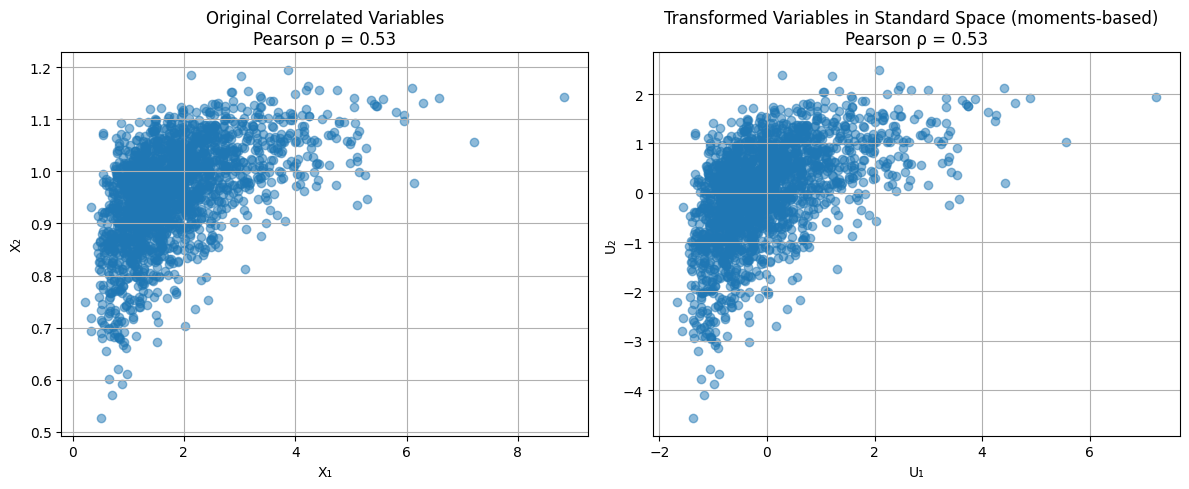

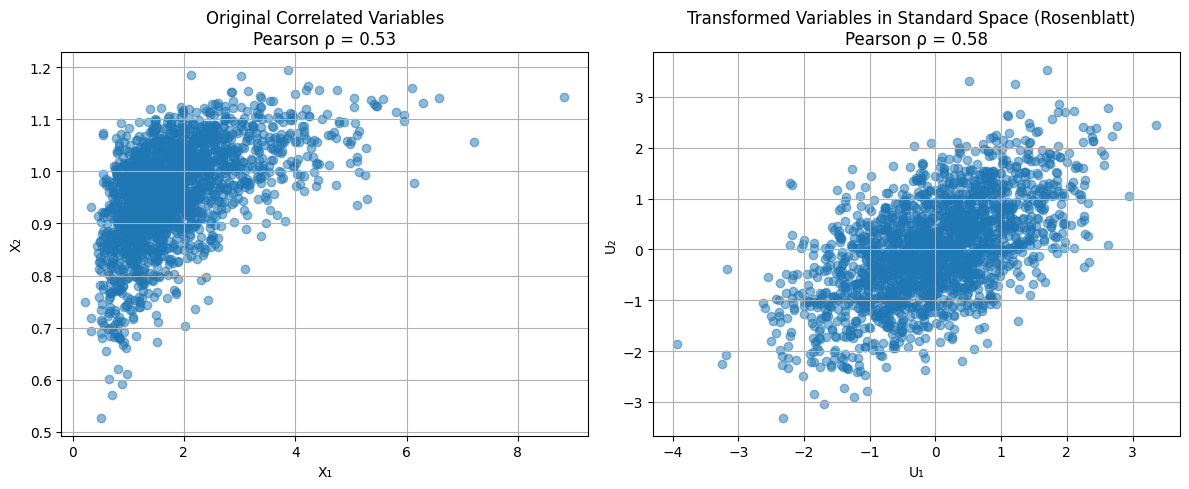

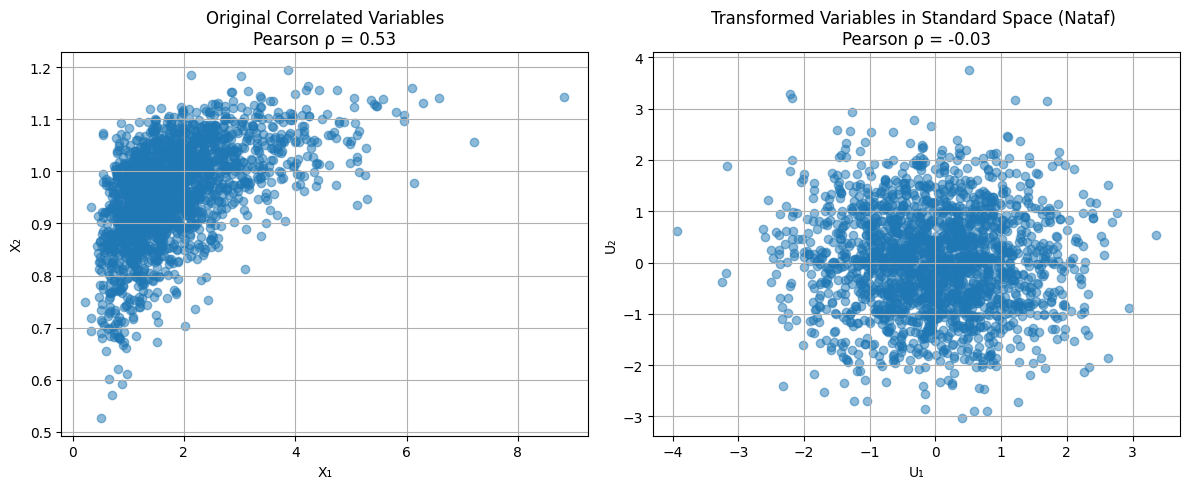

In [49]:
# =====================================================
# 1. Apply Hasofer-Lind Transformation
# =====================================================

U_transformed = HasoferLind(X)

# =====================================================
# Visualize Results
# =====================================================

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original correlated variables
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title(f"Original Correlated Variables\nPearson ρ = {np.corrcoef(X.T)[0,1]:.2f}")
ax[0].set_xlabel("X₁")
ax[0].set_ylabel("X₂")
ax[0].grid()
# Transformed variables in standard space
ax[1].scatter(U_transformed[:, 0], U_transformed[:, 1], alpha=0.5)
ax[1].set_title(f"Transformed Variables in Standard Space (moments-based)  \nPearson ρ = {np.corrcoef(U_transformed.T)[0,1]:.2f}")
ax[1].set_xlabel("U₁")
ax[1].set_ylabel("U₂")
ax[1].grid()
plt.tight_layout()
plt.show()


# =====================================================
# 2. Apply Rosenblatt Transformation
# =====================================================

U_transformed = rosenblatt_transform(X, marginals)

# =====================================================
# Visualize Results
# =====================================================

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original correlated variables
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title(f"Original Correlated Variables\nPearson ρ = {np.corrcoef(X.T)[0,1]:.2f}")
ax[0].set_xlabel("X₁")
ax[0].set_ylabel("X₂")
ax[0].grid()
# Transformed variables in standard space
ax[1].scatter(U_transformed[:, 0], U_transformed[:, 1], alpha=0.5)
ax[1].set_title(f"Transformed Variables in Standard Space (Rosenblatt)  \nPearson ρ = {np.corrcoef(U_transformed.T)[0,1]:.2f}")
ax[1].set_xlabel("U₁")
ax[1].set_ylabel("U₂")
ax[1].grid()
plt.tight_layout()
plt.show()

# =====================================================
# 3. Apply Nataf Transformation
# =====================================================

U_transformed = generalized_nataf_transform(X, marginals, corr_matrix)

# =====================================================
# Visualize Results
# =====================================================

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original correlated variables
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title(f"Original Correlated Variables\nPearson ρ = {np.corrcoef(X.T)[0,1]:.2f}")
ax[0].set_xlabel("X₁")
ax[0].set_ylabel("X₂")
ax[0].grid()
# Transformed variables in standard space
ax[1].scatter(U_transformed[:, 0], U_transformed[:, 1], alpha=0.5)
ax[1].set_title(f"Transformed Variables in Standard Space (Nataf) \nPearson ρ = {np.corrcoef(U_transformed.T)[0,1]:.2f}")
ax[1].set_xlabel("U₁")
ax[1].set_ylabel("U₂")
ax[1].grid()
plt.tight_layout()
plt.show()

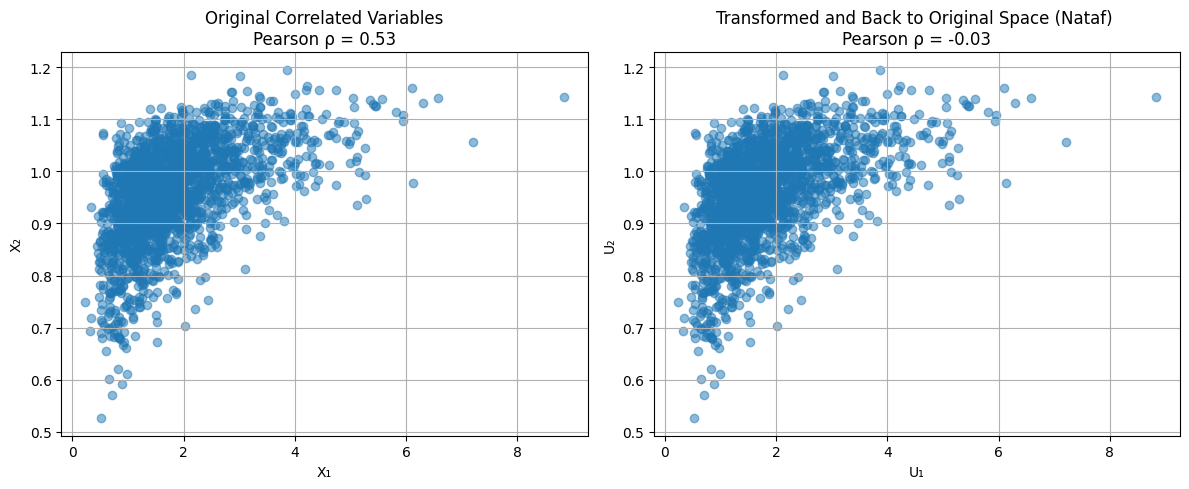

one-to-one correspondance


In [50]:
# =====================================================
# 4. Let see if we can go back. Apply Inverse Nataf Transformation
# =====================================================

U_transformed_nataf = generalized_nataf_transform(X, marginals, corr_matrix)
X_back_to_physical_space = inverse_nataf_transform(U_transformed_nataf, marginals, corr_matrix)

# =====================================================
# Visualize Results
# =====================================================

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original correlated variables
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5)
ax[0].set_title(f"Original Correlated Variables\nPearson ρ = {np.corrcoef(X.T)[0,1]:.2f}")
ax[0].set_xlabel("X₁")
ax[0].set_ylabel("X₂")
ax[0].grid()
# Transformed variables in standard space
ax[1].scatter(X_back_to_physical_space[:, 0], X_back_to_physical_space[:, 1], alpha=0.5)
ax[1].set_title(f"Transformed and Back to Original Space (Nataf) \nPearson ρ = {np.corrcoef(U_transformed.T)[0,1]:.2f}")
ax[1].set_xlabel("U₁")
ax[1].set_ylabel("U₂")
ax[1].grid()
plt.tight_layout()
plt.show()
print('one-to-one correspondance')

Estimated probability of failure = 0.002180


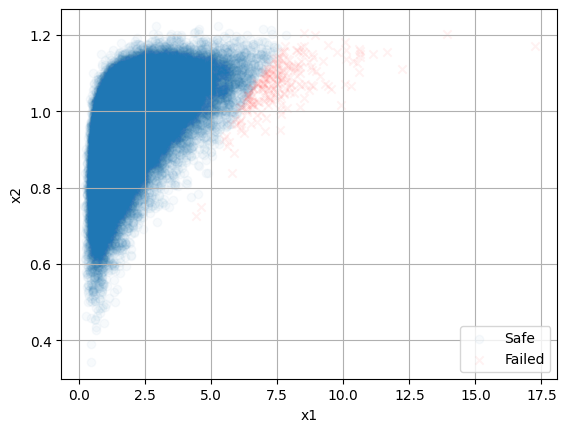

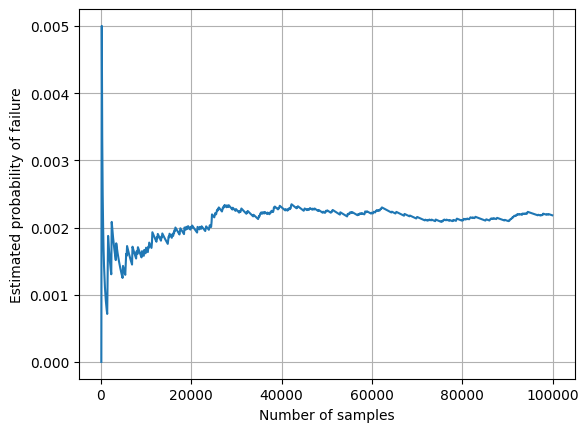

In [75]:

# =====================================================
# Example of Reliability Problem

# g(x1,x2) = 2 - x1 + x2 + 0.5 *x1*x2
# (x1,x2) ~ DGM
# Find Prob[g(x1,x2)<=0]
# =====================================================

# Define the Performance Function g(x)
def g_fun(x1, x2):
    """
    Performance function g(x).
    Args:
        x1, x2: Input variables.
    Returns:
        Value of the performance function.
    """
    return 2 - x1 + x2 + 0.5 *x1*x2  # Example quadratic function

# Define the Indicator Function I(x)
def I_fun(x1, x2):
    """
    Indicator function I(x).
    Args:
        x1, x2: Input variables.
    Returns:
        1 if g(x) <= 0 (failure), 0 otherwise.
    """
    return g_fun(x1, x2) <= 0

# Monte Carlo Estimation
X, _, _ =  DGM(int(1e5))
I_sams = I_fun(X[:, 0], X[:, 1])
mc_estimate_pof = np.mean(I_sams)
print(f"Estimated probability of failure = {mc_estimate_pof:.6f}")
# Visualization
plt.scatter(X[I_sams==0,0], X[I_sams==0,1], alpha=0.03, label=f"Safe")
plt.scatter(X[I_sams==1,0], X[I_sams==1,1], alpha=0.05, c='r', marker='x', label="Failed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()





In [ ]:

# Convergence of the estimator
steps_2_eval = range(100,len(I_sams),50)
Pf_step_k = np.array([np.mean(I_sams[:k]) for k in steps_2_eval])
plt.plot(steps_2_eval, Pf_step_k)
plt.xlabel('Number of samples')
plt.ylabel('Estimated probability of failure')
plt.grid()
plt.show()



In [96]:
import numpy as np
from scipy.stats import binom
#todo: revise
def smallest_rank_for_quantile(n, alpha, beta):
    """
    Find the smallest rank k such that P(x_alpha <= X_(k)) >= beta.

    Args:
        n: Sample size.
        alpha: Quantile level (0 < alpha < 1).
        beta: Confidence level (0 < beta < 1).

    Returns:
        k: The smallest rank satisfying the condition.
    """
    # Iterate over possible ranks k
    for k in range(1, n + 1):
        # Compute the binomial CDF F(n, alpha)(k-1)
        cdf = binom.cdf(k - 1, n, alpha)
        if cdf >= beta:
            return k
    return n  # If no k satisfies the condition, return n

def minimum_sample_size_for_quantile(k, alpha, beta):
    """
    Find the smallest sample size n such that P(x_alpha <= X_(k)) >= beta.

    Args:
        k: Rank of the order statistic.
        alpha: Quantile level (0 < alpha < 1).
        beta: Confidence level (0 < beta < 1).

    Returns:
        n: The smallest sample size satisfying the condition.
    """
    # Start with n = k and increment until the condition is satisfied
    n = k
    while True:
        # Compute the binomial CDF F(n, alpha)(k-1)
        cdf = binom.cdf(k - 1, n, alpha)
        if cdf >= beta:
            return n
        n += 1

def minimum_sample_size_for_probability(p, beta):
    """
    Compute the minimum sample size required to estimate a small probability p
    with confidence beta.

    Args:
        p: Probability to estimate (0 < p < 1).
        beta: Confidence level (0 < beta < 1).

    Returns:
        n: Minimum sample size.
    """
    if p <= 0 or p >= 1:
        raise ValueError("Probability p must be in (0, 1).")
    if beta <= 0 or beta >= 1:
        raise ValueError("Confidence beta must be in (0, 1).")

    # Compute the minimum sample size
    n = np.ceil(np.log(1 - beta) / np.log(1 - p))
    return int(n)


# Example usage
n = 100  # Sample size
alpha = 0.95  # Quantile level (95th percentile)
beta = 0.95  # Confidence level (90%)

# Find the smallest rank k
k_sol = smallest_rank_for_quantile(n, alpha, beta)
print(f"Smallest rank k for n={n}, alpha={alpha}, beta={beta}: {k_sol}")

# Find the minimum sample size n
k = 95  # Desired rank
n_min = minimum_sample_size_for_quantile(k, alpha, beta)
print(f"Minimum sample size for k={k}, alpha={alpha}, beta={beta}: {n_min}")


# Example usage
p = 0.001  # Probability to estimate
beta = 0.99  # Confidence level

n_min = minimum_sample_size_for_probability(p, beta)
print(f"Minimum sample size to estimate p={p} with confidence beta={beta}: {n_min}")
print(f"Minimum sample size to estimate p={p} with confidence beta={beta} is {p*n_min} times 1/Pf")

Smallest rank k for n=100, alpha=0.95, beta=0.95: 99
Minimum sample size for k=95, alpha=0.95, beta=0.95: 95
Minimum sample size to estimate p=0.001 with confidence beta=0.99: 4603
Minimum sample size to estimate p=0.001 with confidence beta=0.99 is 4.603 times 1/Pf


In [97]:
# FORM (First-Order Reliability Method)
from scipy.optimize import minimize
import numpy as np
import scipy.stats as stats
from scipy.linalg import cholesky

# Define the constraint function
def constraint(u, marginals, corr_matrix):
    """
    Constraint function g(x) = 0, where x is obtained by inverting the Nataf transformation.
    Args:
        u: A numpy array of shape (n_dim,) containing the variables in U-space.
        marginals: A list of scipy.stats distribution objects corresponding to the marginals of X.
        corr_matrix: The correlation matrix of X.
    Returns:
        Value of the constraint function g(x).
    """
    # Reshape u to (1, n_dim) for compatibility with inverse_nataf_transform
    u = u.reshape(1, -1)

    # Invert the Nataf transformation to get x
    x = inverse_nataf_transform(u, marginals, corr_matrix)

    # Evaluate the performance function g(x)
    return g_fun(x[:, 0], x[:, 1])

# Find the Most Probable Point (MPP) in U-space
def find_mpp(marginals, corr_matrix):
    """
    Find the Most Probable Point (MPP) in U-space.
    Args:
        marginals: A list of scipy.stats distribution objects corresponding to the marginals of X.
        corr_matrix: The correlation matrix of X.
    Returns:
        u_mpp: MPP in U-space.
    """
    # Objective function: Minimize the distance to the origin
    def objective(u):
        return np.linalg.norm(u)

    # Constraint: g(x) = 0
    def constraint_function(u):
        return constraint(u, marginals, corr_matrix)

    # Initial guess (origin in U-space)
    u0 = np.array([0, 0])

    # Solve the optimization problem
    result = minimize(objective, u0, constraints={'type': 'eq', 'fun': constraint_function})
    return result.x


# Find the MPP
u_mpp = find_mpp(marginals, corr_matrix)

# Step 4: Compute the reliability index beta
beta = np.linalg.norm(u_mpp)

# Step 5: Compute the probability of failure using FORM
pf_form = stats.norm.cdf(-beta)
rel_form = 1-pf_form
# Print results
print("FORM Results:")
print(f"Most Probable Point (MPP) in U-space: {u_mpp}")
print(f"Reliability index (β): {beta:.4f}")
print(f"Probability of failure FORM (P_f): {pf_form:.6f}")
print(f"Reliability FORM (1-P_f): {rel_form:.6f}")

print("\nMonte Carlo Results:")
print(f"Monte Carlo Estimate of P[g(x) <= 0]: {mc_estimate_pof:.6f}")
print(f"Monte Carlo Estimate of P[g(x) > 0]: {1 - mc_estimate_pof:.6f}")


FORM Results:
Most Probable Point (MPP) in U-space: [ 2.78093208 -0.47981175]
Reliability index (β): 2.8220
Probability of failure FORM (P_f): 0.002386
Reliability FORM (1-P_f): 0.997614

Monte Carlo Results:
Monte Carlo Estimate of P[g(x) <= 0]: 0.002180
Monte Carlo Estimate of P[g(x) > 0]: 0.997820


In [98]:
# REVISE
# Step 1: Transform X to U-space (standard normal space)
def transform_to_u_space(x1, x2):
    """
    Transform X to U-space using the inverse CDF.
    Args:
        x1, x2: Input variables in X-space.
    Returns:
        u1, u2: Transformed variables in U-space.
    """
    u1 = stats.norm.ppf(f_x1.cdf(x1))
    u2 = stats.norm.ppf(f_x2.cdf(x2))
    return u1, u2

# Step 2: Compute the gradient of g(x) in U-space (useful to optimize)
def gradient_g_fun(u1, u2):
    """
    Compute the gradient of g(x) in U-space.
    Args:
        u1, u2: Input variables in U-space.
    Returns:
        grad_g: Gradient vector [dg/du1, dg/du2].
    """
    # Transform U back to X-space
    x1 = f_x1.ppf(stats.norm.cdf(u1))
    x2 = f_x2.ppf(stats.norm.cdf(u2))

    # Compute partial derivatives of g(x) with respect to x1 and x2
    dg_dx1 = 2 * (x1 + 3)
    dg_dx2 = 6 * (x2 + 2)

    # Compute partial derivatives of x1 and x2 with respect to u1 and u2
    dx1_du1 = sigma_X1 * np.exp(-0.5 * u1**2) / np.sqrt(2 * np.pi)
    dx2_du2 = sigma_X2 * np.exp(-0.5 * u2**2) / np.sqrt(2 * np.pi)

    # Chain rule: dg/du1 = dg/dx1 * dx1/du1, dg/du2 = dg/dx2 * dx2/du2
    dg_du1 = dg_dx1 * dx1_du1
    dg_du2 = dg_dx2 * dx2_du2

    return np.array([dg_du1, dg_du2])


# Step 3: Find the Most Probable Point (MPP) using an optimization algorithm
from scipy.optimize import minimize

def find_mpp():
    """
    Find the Most Probable Point (MPP) in U-space.
    Returns:
        u_mpp: MPP in U-space.
    """
    # Objective function: Minimize the distance to the origin subject to g(x) = 0
    def objective(u):
        return np.linalg.norm(u)

    # Constraint: g(x) = 0
    def constraint(u):
        x1 = f_x1.ppf(stats.norm.cdf(u[0]))
        x2 = f_x2.ppf(stats.norm.cdf(u[1]))
        return g_fun(x1, x2)

    # Initial guess (origin in U-space)
    u0 = np.array([0, 0])

    # Solve the optimization problem
    result = minimize(objective, u0, constraints={'type': 'eq', 'fun': constraint})
    return result.x


In [99]:
# problem specific performance function:

 # Define the Performance Function g(x)
def g_fun(x1, x2, params=None):
    """
    Performance function g(x).
    Args:
        x1, x2: Input variables.
        params: Optional parameters for the function.
    Returns:
        Value of the performance function.
    """
    if params is None:
        params = [1, 1]

    return (x1 + 3 + params[1] * params[0])**2 + params[0] * 3 * (x2 + 2)**2 - 12

# Define the Indicator Function I(x)
def I_fun(x1, x2):
    """
    Indicator function I(x).
    Args:
        x1, x2: Input variables.
    Returns:
        1 if g(x) <= 0 (bad performance), 0 otherwise.
    """
    return g_fun(x1, x2) <= 0





Monte Carlo Estimate of P[g(x) <= 0]: 1.46e-06
Monte Carlo Estimate of P[g(x) > 0]: 0.99999854


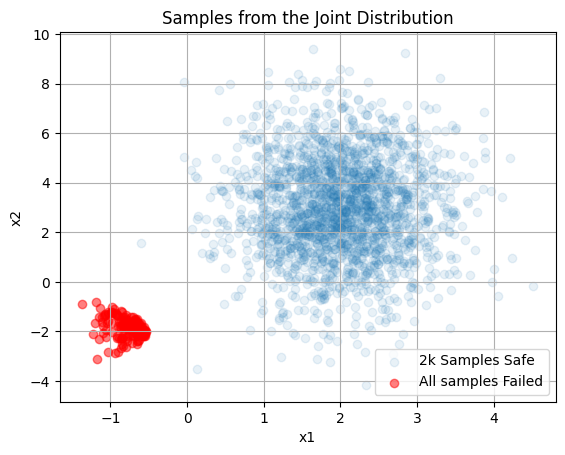

In [100]:

# Define the Joint Probability Distribution f(x1, x2)
# Define distribution parameters
mu_x1, mu_x2 = 2, 3
sigma_x1, sigma_x2 = 0.7, 2

# Define normal distribution objects
f_x1 = stats.norm(loc=mu_x1, scale=sigma_x1)
f_x2 = stats.norm(loc=mu_x2, scale=sigma_x2)

# Monte Carlo Estimation
sample_size = 100_000_000
samples_x1 = f_x1.rvs(size=sample_size)
samples_x2 = f_x2.rvs(size=sample_size)
I_sams = I_fun(samples_x1, samples_x2)
mc_estimate_pof = np.mean(I_sams)

print(f"Monte Carlo Estimate of P[g(x) <= 0]: {mc_estimate_pof}")
print(f"Monte Carlo Estimate of P[g(x) > 0]: {1- mc_estimate_pof}")

# Visualization
n2p = 2
plt.scatter(samples_x1[:n2p*1000], samples_x2[:n2p*1000], alpha=0.1, label=f"{n2p}k Samples Safe")
plt.scatter(samples_x1[I_sams==1], samples_x2[I_sams==1], alpha=0.5, c='r', label="All samples Failed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Samples from the Joint Distribution')
plt.legend()
plt.grid()
plt.show()

In [101]:
# Define means and standard deviations for X1 and X2
mu_X1, sigma_X1 = 200, 20
mu_X2, sigma_X2 = 150, 10

# Define the performance function parameters in U-space
gradient_g = np.array([20, 10])  # Gradient components of g(U)
g_u0 = 50  # Performance function at U = (0,0)

# Compute the magnitude of the gradient
norm_gradient = np.linalg.norm(gradient_g)

# Compute the reliability index beta
beta = abs(g_u0) / norm_gradient

# Compute the probability of failure
pf_form = norm.cdf(-beta)

print(f"FORM")
print(f"Reliability index (β): {beta:.4f}")
print(f"Probability of failure FORM (P_f): {pf_form:.4f}")
print(f"Reliability FORM (1-P_f): {1-pf_form:.4f}")

print(f"Monte Carlo")
print(f"Monte Carlo Estimate of P[g(x) <= 0]: {mc_estimate_pof}")
print(f"Monte Carlo Estimate of P[g(x) > 0]: {1- mc_estimate_pof}")


FORM
Reliability index (β): 2.2361
Probability of failure FORM (P_f): 0.0127
Reliability FORM (1-P_f): 0.9873
Monte Carlo
Monte Carlo Estimate of P[g(x) <= 0]: 1.46e-06
Monte Carlo Estimate of P[g(x) > 0]: 0.99999854


In [ ]:
# Define the normal distributions for x1 and x2
mu_x1, mu_x2 = 2, 3
sigma_x1, sigma_x2 = 1, 1

# Create a grid of points for x1 and x2
x1_range = np.linspace(mu_x1 - 5*sigma_x1, mu_x1 + 5*sigma_x1, 100)
x2_range = np.linspace(mu_x2 - 5*sigma_x2, mu_x2 + 5*sigma_x2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate the joint probability density function (PDF)
f_x1_x2 = norm.pdf(X1, loc=mu_x1, scale=sigma_x1) * norm.pdf(X2, loc=mu_x2, scale=sigma_x2)

# Data transformation to standard space: x -> u Hasofer-Lind 2nd Moment transformation
U1 = (X1 - mu_x1) / sigma_x1
U2 = (X2 - mu_x2) / sigma_x2


# Transform g(x) to g(u)
def g_u(u1, u2):
    x1 = u1 * sigma_x1 + mu_x1
    x2 = u2 * sigma_x2 + mu_x2
    return g_fun(x1, x2)

# Define the indicator function in the standard space
def I_u(u1,u2):
    return g_u(u1,u2) <= 0

# Plot the iso-probability curves of f(x1, x2)
plt.figure(figsize=(10, 8))
CS = plt.contour(X1, X2, f_x1_x2, levels=7, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

# Plot the failure region defined by I(x)
failure_region = np.where(I_fun(X1, X2) == 1)
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=1, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()


# Calculate the joint PDF in the standard space
f_u1_u2 = norm.pdf(U1, loc=0, scale=1) * norm.pdf(U2, loc=0, scale=1)

# Plot I(u) and f(u)
plt.figure(figsize=(10, 8))
CS = plt.contour(U1, U2, f_u1_u2, levels=10, colors='blue')
plt.clabel(CS, inline=1, fontsize=10)

failure_region_u = np.where(I_u(U1, U2) == 1)
plt.scatter(U1[failure_region_u], U2[failure_region_u], color='red', s=1, label='Failure Region (U)')
plt.grid()
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Failure region and joint PDF in standard space')
plt.legend()
plt.show()

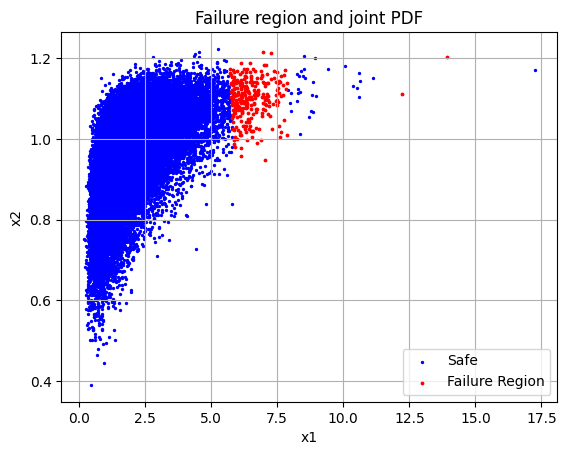

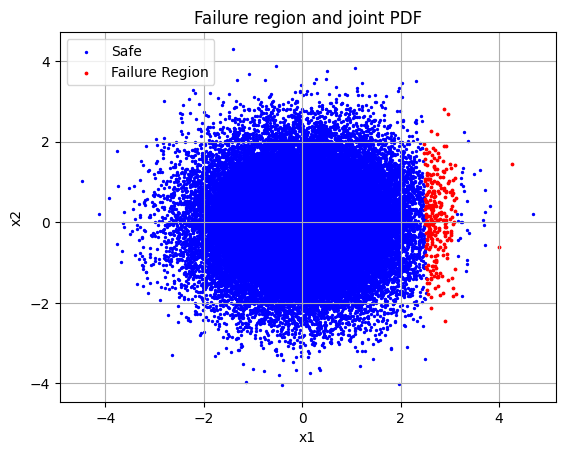

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

X, marginals, corr_matrix =  DGM(50000)

# Define the non-transformed limit state function g(x)
def g(x1, x2):
    return  10 - 0.5*np.exp(x1*np.sin(x2+x1))

# Define the indicator function I(x) for failure region
def I(x1, x2):
    return g(x1, x2) <= 0  # Failure region where g(x) <= 0

# Plot the failure region in the original space
X1, X2 = X[:, 0], X[:, 1]
failure_region = np.where(I(X1, X2) == 1)
plt.scatter(X1[I(X1, X2) == 0], X2[I(X1, X2) == 0], color='blue', s=2, label='Safe')
plt.scatter(X1[failure_region], X2[failure_region], color='red', s=3, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()

# Data transformation to standard space: x -> u (Rosenblatt transformation)
U_transformed = generalized_nataf_transform(X, marginals, corr_matrix)

U1, U2 = U_transformed[:, 0], U_transformed[:, 1]
# Plot the failure region in the original space
plt.scatter(U1[I(X1, X2) == 0], U2[I(X1, X2) == 0], color='blue', s=2, label='Safe')
plt.scatter(U1[failure_region], U2[failure_region], color='red', s=3, label='Failure Region')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Failure region and joint PDF')
plt.legend()
plt.show()


In [ ]:
import time

tac = time.time()
X, _, _ =  DGM(int(2e6))
I_samples = I(X[:,0], X[:,1])
Pf_MC = np.mean(I_samples)

tic = time.time()

print(f"Monte Carlo Simulation")
print(f"Unreliability $P_F=$: {Pf_MC}")
print(f"Reliability: {1-Pf_MC}")
print(f"Time elapsed: {tic-tac}  [seconds]")

# Convergence of the estimator
steps_2_eval = range(100,len(I_samples),250)
Pf_step_k = np.array([np.mean(I_samples[:k]) for k in steps_2_eval])
plt.plot(steps_2_eval, Pf_step_k)
plt.xlabel('Number of samples')
plt.ylabel('Estimated probability of failure')
plt.grid()
plt.show()



In [79]:
import numpy as np
from scipy.stats import norm, lognorm
from scipy.optimize import minimize

# Define the limit state function g(x)
def g(x1, x2):
    return x1**2 + 3*x2**2 - 6

# Define the Rosenblatt transformation
def ros_transformation(x1, x2, mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Apply the CDF transformations to get U1 and U2
    F_X1 = norm.cdf(x1, loc=mu_x1, scale=sigma_x1)
    F_X2 = lognorm.cdf(x2, s=sigma_x2, scale=np.exp(mu_x2))

    # Apply the inverse CDF to get the standard normal variables
    U1 = norm.ppf(F_X1)
    U2 = norm.ppf(F_X2)
    return U1, U2

# Define the optimization function to find the MPP
def mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Objective function to minimize (g(x) should be minimized)
    def objective(u):
        # Transform back to original space
        x1 = norm.ppf(norm.cdf(u[0])) * sigma_x1 + mu_x1
        x2 = lognorm.ppf(norm.cdf(u[1]), s=sigma_x2, scale=np.exp(mu_x2))
        return g(x1, x2)

    # Initial guess (start near the origin)
    u_init = np.array([0, 0])

    # Perform optimization (search for MPP)
    result = minimize(objective, u_init, bounds=[(-10, 10), (-10, 10)])

    # Get the MPP
    u_mpp = result.x
    return u_mpp

# Define the function to calculate the reliability
def calculate_reliability(beta):
    # Reliability is the CDF of the standard normal evaluated at beta
    return norm.cdf(beta)

# Define the main function to execute FORM
def form(mu_x1, sigma_x1, mu_x2, sigma_x2):
    # Step 1: Find the MPP in U-space
    u_mpp = mpp_optimization(mu_x1, sigma_x1, mu_x2, sigma_x2)

    # Step 2: Calculate the reliability index beta
    beta = np.linalg.norm(u_mpp)  # Reliability index is the distance from the origin

    # Step 3: Calculate the reliability
    reliability = calculate_reliability(beta)

    return beta, reliability

# Define the parameters of the distributions
mu_x1, sigma_x1 = 2, 1  # Normal distribution parameters
mu_x2, sigma_x2 = 0.5, 0.2  # Lognormal distribution parameters

# Perform FORM analysis
beta, reliability = form(mu_x1, sigma_x1, mu_x2, sigma_x2)

print("Reliability Index (beta):", beta)
print("Reliability (R):", reliability)


Reliability Index (beta): 10.198039031682757
Reliability (R): 1.0


### Problem Explanation

In this example, we are analyzing the failure mode of a cantilever beam, where the failure occurs if the tip displacement exceeds an allowable value \(D_0 = 3\) inches. The performance function is given by:

\[
g(D) = D_0 - \frac{4 P_x P_y L^3}{E w t^3}
\]

Where:
- \( E = 30 \times 10^6 \) psi is the modulus of elasticity,
- \( L = 100 \) inches is the length of the beam,
- \( w = 2 \) inches and \( t = 4 \) inches are the width and height of the cross section, respectively,
- \( P_x \sim N(500, 100) \) lb is the normal distribution of the external force in the x-direction,
- \( P_y \sim N(1000, 100) \) lb is the normal distribution of the external force in the y-direction,
- \( D_0 = 3 \) inches is the allowable tip displacement.

We will estimate the probability of failure by generating random samples for the forces \( P_x \) and \( P_y \) using Monte Carlo simulation. The failure occurs when the performance function \( g(D) \) is less than or equal to zero, which we will calculate for a large number of random samples.

The results will be visualized using a histogram to show the distribution of the performance function and the probability of failure.


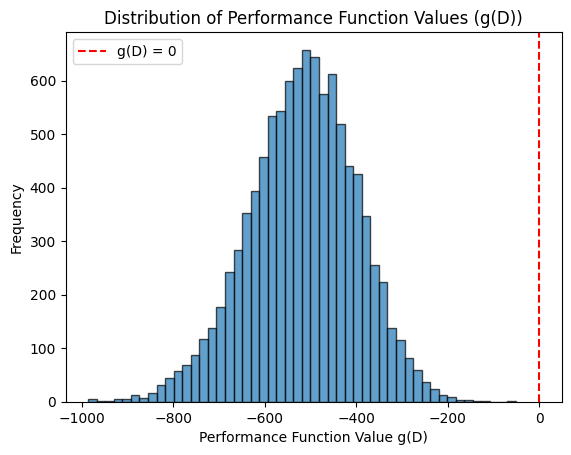

Estimated probability of failure: 1.0000


In [77]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given constants
E = 30e6  # Modulus of elasticity (psi)
L = 100   # Length of the beam (inches)
D0 = 3    # Allowable tip displacement (inches)
w = 2     # Width of the cross section (inches)
t = 4     # Height of the cross section (inches)

# External forces Px and Py with normal distributions
mean_Px = 500  # Mean of Px (lb)
std_Px = 100   # Standard deviation of Px (lb)

mean_Py = 1000 # Mean of Py (lb)
std_Py = 100   # Standard deviation of Py (lb)

# Define performance function (g function)
def performance_function(Px, Py):
    # Displacement formula from the given equation
    displacement = (4 * Px * Py * L**3) / (E * w * t**3)
    return D0 - displacement  # Performance function g(D)

# Generate random samples of Px and Py from normal distributions
num_samples = 10000  # Number of samples for Monte Carlo simulation
Px_samples = np.random.normal(mean_Px, std_Px, num_samples)
Py_samples = np.random.normal(mean_Py, std_Py, num_samples)

# Compute the performance function for each sample
g_values = performance_function(Px_samples, Py_samples)

# Plotting the results (distribution of performance function values)
plt.hist(g_values, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="g(D) = 0")
plt.xlabel('Performance Function Value g(D)')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Function Values (g(D))')
plt.legend()
plt.show()

# Calculate probability of failure (g(D) <= 0)
failure_probability = np.mean(g_values <= 0)
print(f'Estimated probability of failure: {failure_probability:.4f}')
